# Convolutional Neural Networks (CNNs)
 Are a type of deep learning model primarily used for processing data that has a grid-like topology, such as images. CNNs are exceptionally good at capturing spatial hierarchies in data, which is why they have become a dominant method in computer vision tasks.

Here's a basic introduction to implementing a CNN using PyTorch, a popular deep learning library in Python:

**Key Components of a CNN:**

**Convolutional Layers:** These layers apply a number of filters to the input. Each filter captures different aspects of the input, such as edges or textures.

**Activation Functions:** Following each convolution operation, an activation function like ReLU (Rectified Linear Unit) is used to introduce non-linearities into the model, helping it to learn more complex patterns.

**Pooling Layers:** These layers reduce the spatial dimensions (width and height) of the input volume for the next convolutional layer. Max pooling is a commonly used method.

**Fully Connected (Dense) Layers:** Towards the end, CNNs have one or more fully connected layers to perform classification based on the features extracted by convolutional and pooling layers.

**Output Layer:** The final layer, which outputs the prediction of the network, such as the class probabilities in classification tasks.

## Example of CNN in PyTorch

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

# Running your model with cpu or gpu based on gpu availability
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()
device



device(type='cuda')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)  
        self.fc2 = nn.Linear(512, 10)  # Output 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the CNN model
model = SimpleCNN()
model.to(device)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

## MNIST Fashion Dataset

The MNIST Fashion dataset is a collection of 70,000 grayscale images of 10 different clothing items, such as shirts, dresses, and shoes. Each image is 28x28 pixels. The dataset is split into 60,000 training images and 10,000 test images. It's a more challenging alternative to the original MNIST dataset of handwritten digits and is widely used for benchmarking machine learning algorithms in computer vision.

**Training a CNN on the MNIST Fashion Dataset using PyTorch**

To train a CNN on this dataset using PyTorch, follow these steps:

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


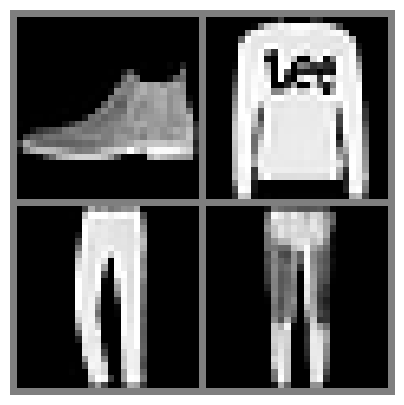

In [9]:
import numpy as np  
import matplotlib.pyplot as plt
images, labels = next(iter(testloader))  
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Plot the images
plt.figure(figsize=(5,5))
imshow(torchvision.utils.make_grid(images, nrow=2, padding=1))
plt.show()

In [7]:
# Define a Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#Train the Network
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device) 
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.295
[1,  4000] loss: 0.299
[1,  6000] loss: 0.285
[1,  8000] loss: 0.284
[1, 10000] loss: 0.289
[1, 12000] loss: 0.271
[1, 14000] loss: 0.263
Finished Training


In [10]:
#  Test the Network on the Test Data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        images = images.to(device) 
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 88 %


# Question 1: 

Given the simple CNN model you've been working with for classifying images in the MNIST Fashion dataset, your task is to improve the model's accuracy by modifying its architecture. 

Consider **some** of the following aspects for modification:

- Adding more layers 
- Change Kernel Sizes 
- Adjust Stride and Padding
- Incorporating Dropout and Batch Normalization: Consider adding dropout layers to reduce overfitting, and batch normalization layers to stabilize and speed up training. Where would you insert these layers in the architecture for optimal performance?
- Change Activation function
- Add Pooling Layers 
- Optimizing Hyperparameters: Beyond architectural changes, think about how adjusting hyperparameters like the learning rate, batch size, and number of epochs.

Report on what did you change? and what impacted the model's performance?

## Transfer Learning for CIFAR10 Dataset

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It's particularly popular in the field of deep learning due to the time and resources required to train deep networks from scratch.

**Terminology** 

**Pre-Trained Models:** Often, the starting point is a model that has been pre-trained on a large and general dataset. For example, models trained on ImageNet, which contains millions of images in thousands of categories, are commonly used.

**Feature Extraction:** In transfer learning, the pre-trained model acts as a feature extractor. The final layers of the model are typically replaced with layers to the specific task at hand. For instance, in image classification, the last fully connected layers are often replaced to suit the number of classes in the new task.

**Fine-Tuning:** In some cases, not only are the final layers of the model retrained, but the entire network (or a significant part of it) is also fine-tuned on the new data. This approach is particularly beneficial when the new dataset is large and not very similar to the original dataset used for pre-training.

**When to Use Transfer Learning:**

**Small Datasets:** If you don't have enough data to train a deep network from scratch.

**Computational Constraints:** If training a model from scratch is computationally unfeasible.

**Baseline Model:** To quickly establish a baseline performance for a new task.

<img src="https://www.researchgate.net/publication/342400905/figure/fig4/AS:905786289057792@1592967688003/The-architecture-of-our-transfer-learning-model.jpg" style="height:300px" />


For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size. CIFAR10 dataset  is described in https://www.cs.toronto.edu/~kriz/cifar.html.

In [11]:
classes = ('plane', 'car' , 'bird',
    'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')

In [12]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import torch.nn as nn

transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])
train_dataset = dsets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = dsets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


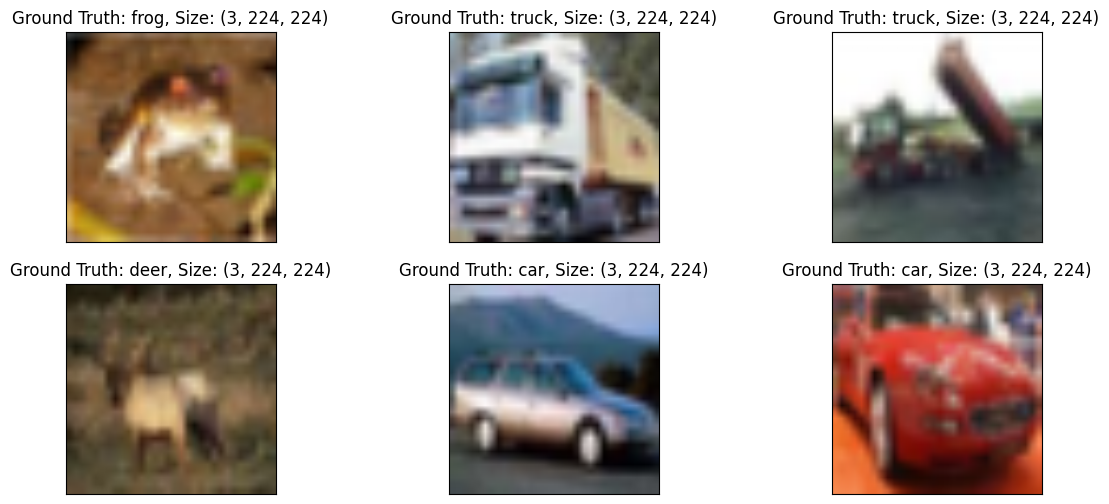

In [14]:
import numpy as np
fig = plt.figure(figsize=(14, 6))  

for i in range(6):
  plt.subplot(2,3,i+1)
  image, label = train_dataset[i]
  npimg = image.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.title(f"Ground Truth: {classes[label]}, Size: {npimg.shape}")
  plt.xticks([])
  plt.yticks([])

We only draw 2500 data randomly for train set and take 500 data for test set. This could highlight the potential benefits of transfer learning, especially when dealing with a limited amount of data in our target task.

In [15]:

transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    )
])
train_dataset = dsets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = dsets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

subset_size = 2500  # Number of training samples you want
import random
ra=random.sample(range(0,len(train_dataset)), subset_size) # generate random indicies
#print(ra)
train_dataset = torch.utils.data.Subset(train_dataset, ra)
train_dataset, val_dataset = random_split(train_dataset, [2000, 500]) # split to train and validation
subset_size = 500  # Number of test samples you want
test_dataset = torch.utils.data.Subset(test_dataset, range(subset_size))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=200,
                                           shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=200,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=200,
                                          shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


The ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) is an annual competition that has significantly influenced advancements in computer vision technology. In the 2014 edition of this challenge, a groundbreaking model was introduced by Karen Simonyan and Andrew Zisserman, affiliated with the Visual Geometry Group at the Department of Engineering Science, University of Oxford. Their research, presented in the paper "VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION," achieved remarkable success, securing the top positions in both object detection and classification categories. The paper is publicly accessible and can be found at the following link: arXiv:1409.1556.

One of the notable models from this research is the VGG16, a Convolutional Neural Network (CNN) designed for object detection and classification tasks. It stands out for its ability to categorize images into 1000 distinct classes with a high accuracy rate of 92.7%. Due to its efficacy and the relative ease of implementation through transfer learning techniques, VGG16 has become a popular choice for image classification applications.

Below is a visualization related to the VGG16 model:

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png">

## VGG16 

VGG16 is a popular deep convolutional neural network model known for its simplicity and depth. It was introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition." The model achieves an excellent balance between complexity and performance, making it a favorite in the image recognition and classification tasks.

**Key Features of VGG16:**

**Convolutional Layers:** VGG16 is comprised of 16 layers, with 13 convolutional layers and 3 fully connected layers.

**Uniform Architecture:** All convolutional layers use a small receptive field of 3x3 with a stride of 1 pixel.

**Pooling Layers:** Max pooling is used throughout the network, typically following every few convolutional layers.

**Fully Connected Layers:** Three fully connected layers are at the end of the network. The first two have 4096 channels each, and the third performs the final classification (1000 classes for ImageNet).

**ReLU Activation:** The Rectified Linear Unit (ReLU) activation function is used throughout the network.

In [16]:
import torchvision.models as models

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# If you want to use the model for inference (i.e., without training), set it to evaluation mode
vgg16.eval()

# Example: Print the model architecture
print(vgg16)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Using VGG16 for Transfer Learning:**

When using VGG16 for tasks other than the 1000-class ImageNet classification, you can modify the final layers to suit your specific needs. Here's a basic example for transfer learning:

In [17]:
from torch import nn

# Replace the classifier (fully connected layers)
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 10)  # Replace 'number_of_your_classes' with your dataset's class count

# Now you can train vgg16 on your dataset
# Remember to set the model to training mode
vgg16.train()

print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Now lets transfer learning with the VGG16 model to the CIFAR10 dataset using PyTorch.**

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
from torch.utils.data import Subset


In [19]:
transform = transforms.Compose(
    [transforms.Resize(224),  # Resize the images to 224x224 to match the VGG16 input size
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
full_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# For the training set
subset_size = 2500  # Number of training samples you want
train_indices = random.sample(range(0, len(full_trainset)), subset_size)  # Generate random indices
trainset = Subset(full_trainset, train_indices)

# For the test set
test_subset_size = 500  # Number of test samples you want
test_indices = random.sample(range(0, len(full_testset)), test_subset_size)  # Generate random indices
testset = Subset(full_testset, test_indices)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



Files already downloaded and verified
Files already downloaded and verified
Using device: cuda:0


In [20]:
vgg16 = torchvision.models.vgg16(pretrained=True).to(device)

# Freeze model weights
for param in vgg16.features.parameters():
    param.requires_grad = False

# Modify the classifier
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, len(classes)).to(device)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001, momentum=0.9)


In [22]:
for epoch in range(10):  # Loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # For accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculating average loss per epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    print('Epoch: %d, Loss: %.3f, Accuracy: %.2f%%' % (epoch + 1, epoch_loss, epoch_acc))

print('Finished Training')


Epoch: 1, Loss: 1.156, Accuracy: 60.00%
Epoch: 2, Loss: 0.589, Accuracy: 79.40%
Epoch: 3, Loss: 0.339, Accuracy: 87.88%
Epoch: 4, Loss: 0.204, Accuracy: 92.96%
Epoch: 5, Loss: 0.096, Accuracy: 96.84%
Epoch: 6, Loss: 0.045, Accuracy: 98.40%
Epoch: 7, Loss: 0.037, Accuracy: 98.84%
Epoch: 8, Loss: 0.024, Accuracy: 99.36%
Epoch: 9, Loss: 0.016, Accuracy: 99.44%
Epoch: 10, Loss: 0.009, Accuracy: 99.80%
Finished Training


In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 77 %


## Question 2: 

Change the previous code to use validation set, try to improve this model performance. when done create a plot that shows both training and validation accuracy as a function of epochs.

**Analysis:**

- Discuss your findings based on the plot. How does the model's performance on the validation set compare to the training set as training progresses?
- Look for signs of overfitting or underfitting and suggest any potential reasons for these phenomena.
- Reflect on the effectiveness of the modifications you made to improve the model’s performance.

## Question 3: Develop a Custom CNN for CIFAR-10 Classification 

Your task is to design and implement your own convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. CIFAR-10 is a well-known dataset in machine learning, consisting of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. Here are the specific requirements for your project:

- Design a CNN from scratch. CBe mindful of the hyperparameters, including the learning rate, number of epochs, and especially the batch size.
- Consider the architecture carefully, deciding on the number and types of layers.
- Be mindful of the hyperparameters, including the learning rate, number of epochs, and especially the batch size.
- Evaluate your model's performance on the CIFAR-10 test set and report the results.

Pay special attention to the batch size. Discuss how the batch size can impact the memory usage.
